In [2]:
import numpy as np
import pyPLUTO as pp
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
from scipy.integrate import quad
rc('text', usetex=True)
rcParams['figure.figsize'] = (15., 6.0)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
import seaborn
seaborn.despine()
seaborn.set_style('white', {'axes.linewidth': 0.5, 'axes.edgecolor':'black'})
seaborn.despine(left=True)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 1

In [4]:
%aimport f

In [21]:
JC=np.load('../Data/jet-3c.npz')
aJC=np.load('../Data/afterJet.npz')
#f.quadruple(JC,np.log10(JC['RHO']),rows=3,tdk='kyrs')

In [22]:
mm=max(JC['T'].shape[0],aJC['T'].shape[0])
TT=np.arange(mm)
times=JC['T'] if JC['T'].shape[0]>aJC['T'].shape[0] else aJC['T']

In [33]:
def get_gas(RHO,aV,Temp,TT):
    #return np.array([RHO[:,:,t][np.logical_and(np.logical_and(aV[:,:,t]>6.7e-4,aV[:,:,t]<2.3e-3),Temp[:,:,t]<1e7)].sum()/RHO[:,:,t].sum() for t in TT])
    return np.array([RHO[:,:,t][aV[:,:,t]>6.7e-4].sum()/RHO[:,:,t].sum() for t in TT])

In [34]:
%%time
Mfj=get_gas(JC['RHO'],np.sqrt(JC['Vx']**2+JC['Vy']**2),JC['PRS']*f.Temp0/JC['RHO'],np.arange(JC['T'].shape[0]))
Mfaj=get_gas(aJC['RHO'],np.sqrt(aJC['Vx']**2+aJC['Vy']**2),aJC['PRS']*f.Temp0/aJC['RHO'],np.arange(aJC['T'].shape[0]))

CPU times: user 1min 1s, sys: 7.62 s, total: 1min 8s
Wall time: 1min 14s


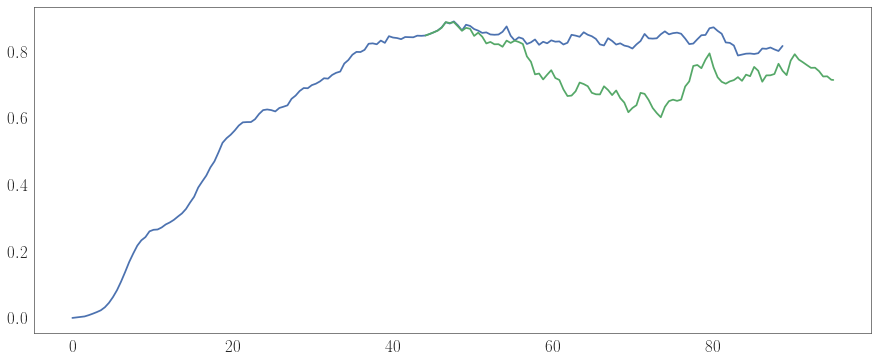

In [35]:
p=85
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Mfj)
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,Mfaj[1:mm-p])

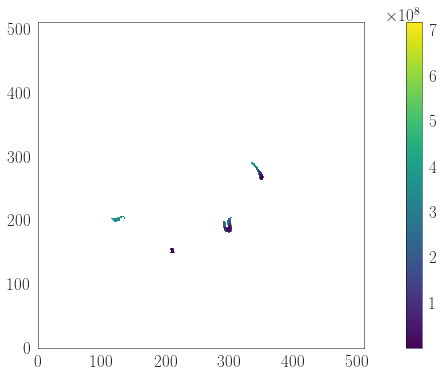

In [26]:
Temp=JC['PRS']*f.Temp0/JC['RHO']
Tempm=np.ma.masked_where(JC['RHO']<10,Temp)
plt.imshow(Tempm[:,:,-1].T,cmap='viridis',origin='lower')
#plt.contour(np.log10(JC['RHO'][:,:,-1]).T,origin='lower',levels=[1.,2.,3.])
plt.colorbar()

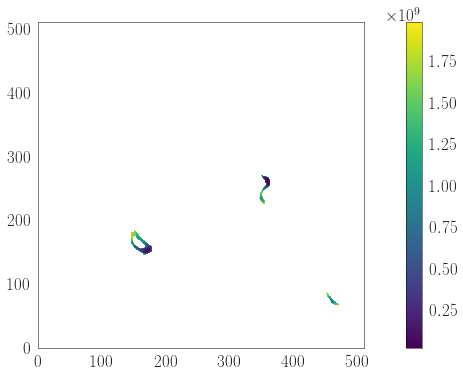

In [27]:
aTemp=aJC['PRS']*f.Temp0/aJC['RHO']
aTempm=np.ma.masked_where(aJC['RHO']<10,aTemp)
plt.imshow(aTempm[:,:,-1].T,cmap='viridis',origin='lower')
#plt.contour(np.log10(JC['RHO'][:,:,-1]).T,origin='lower',levels=[1.,2.,3.])
plt.colorbar()

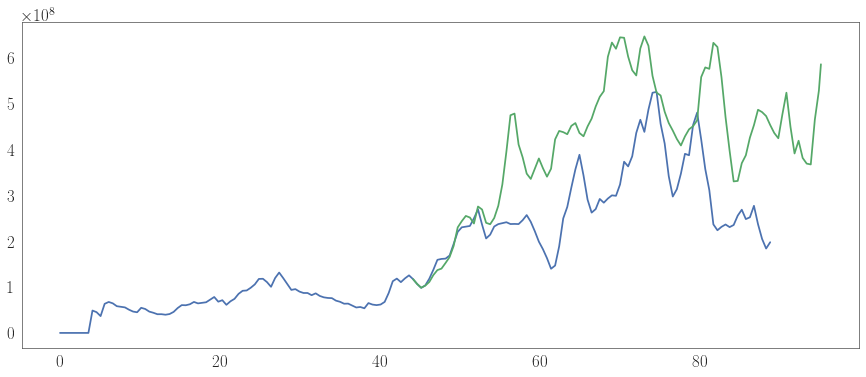

In [28]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Tempm.mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,aTempm.mean(axis=(0,1))[1:mm-p])

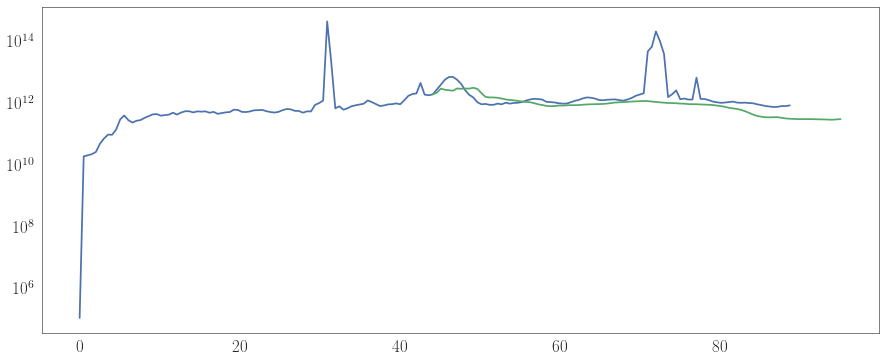

In [29]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Temp.mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,aTemp.mean(axis=(0,1))[1:mm-p])
plt.yscale('log')

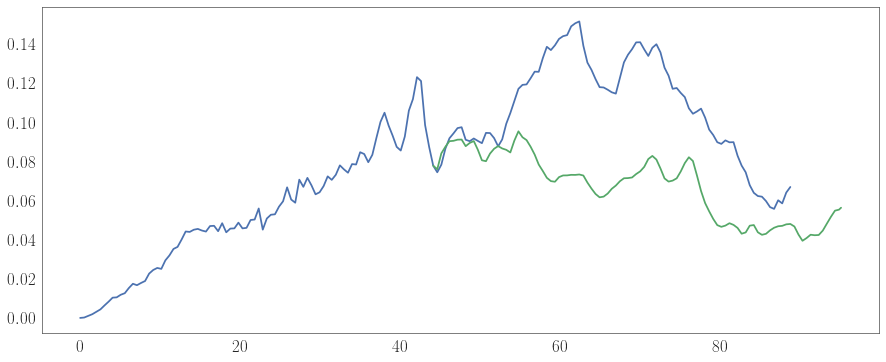

In [30]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,(np.sqrt(JC['Vx']**2+JC['Vy']**2)).mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,(np.sqrt(aJC['Vx']**2+aJC['Vy']**2)).mean(axis=(0,1))[1:mm-p])

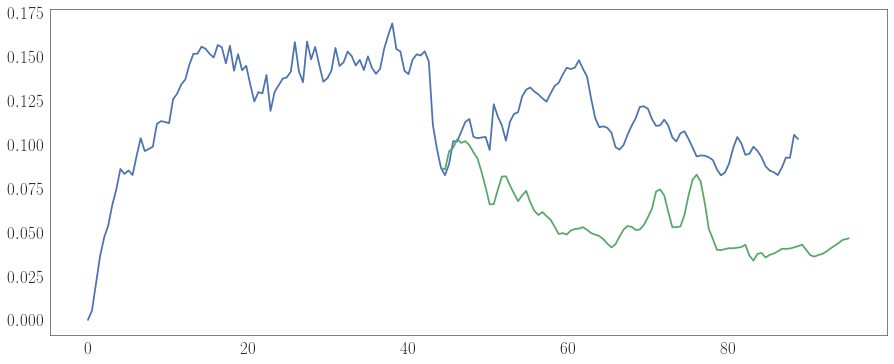

In [31]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,(np.sqrt(JC['Vx']**2+JC['Vy']**2)).std(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,(np.sqrt(aJC['Vx']**2+aJC['Vy']**2)).std(axis=(0,1))[1:mm-p])
#plt.yscale('log')

CPU times: user 2min 33s, sys: 1min 3s, total: 3min 37s
Wall time: 4min 47s


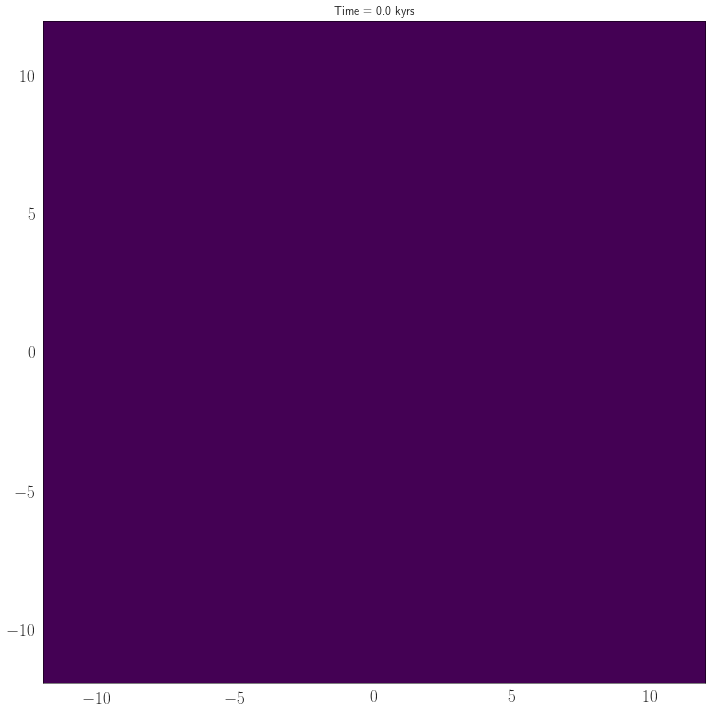

In [32]:
%%time
FF=JC
vfile='V'#'test'
step=1

VAR=np.sqrt(FF['Vx']**2+FF['Vy']**2)#np.log10(FF['RHO'])###
T = FF['T'][::step]
fig=plt.figure(figsize=(10,10))
fig.set_tight_layout(True)
ax1=plt.subplot()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
ext=[FF['X'].min(),FF['X'].max(),FF['Y'].min(),FF['Y'].max()]

pc = ax1.imshow(VAR[:,:,0].T,cmap='viridis',origin='lower',aspect='equal',extent=ext,
                            vmin=VAR.min(axis=2).min(),vmax=VAR.max(axis=2).max())
def update(i):
    ax1.cla()
    pc = ax1.imshow(VAR[:,:,i].T,cmap='viridis',origin='lower',aspect='equal',extent=ext,
                    vmin=VAR.min(axis=2).min(),vmax=VAR.max(axis=2).max())
    label = 'Time = {0:.1f} kyrs'.format(T[i]/1000.)
    ax1.set_title(label)
    return ax1
anim = FuncAnimation(fig, update, frames=range(T.shape[0]), interval=250)
anim.save(vfile+'.gif',writer='imagemagic')